In [18]:
import os
import scanpy as sc
import anndata as ad
import pandas as pd
import numpy as np
import muon as mu


In [19]:
raw_file_dir = "/gpfs/Labs/Uzun/DATA/PROJECTS/2024.SC_MO_TRN_DB.MIRA/REPOSITORY/CURRENT/SINGLE_CELL_DATASETS/DS014_DOI496239_MOUSE_ESC_RAW_FILES/E7.5_rep1"

for file in os.listdir(raw_file_dir):
    print(file)

GSM6205416_E7.5_rep1_GEX_barcodes.tsv.gz
GSM6205427_E7.5_rep1_ATAC_fragments.tsv.gz
GSM6205416_E7.5_rep1_GEX_matrix.mtx.gz
GSM6205416_E7.5_rep1_GEX_features.tsv.gz


In [36]:
# Read in the scRNAseq nad scATACseq dataset using Muon
adata = mu.read_10x_mtx(raw_file_dir, prefix="GSM6205416_E7.5_rep1_GEX_", cache_compression='gzip', extended=True)

Only considering the two last: ['.mtx', '.gz'].
Only considering the two last: ['.mtx', '.gz'].


In [37]:
adata

MuData object with n_obs × n_vars = 8936 × 232170
  var:	'gene_ids', 'feature_types'
  2 modalities
    rna:	8936 x 32285
      var:	'gene_ids', 'feature_types'
    atac:	8936 x 199885
      var:	'gene_ids', 'feature_types'

In [38]:
atac = adata.mod['atac']
atac

AnnData object with n_obs × n_vars = 8936 × 199885
    var: 'gene_ids', 'feature_types'

In [39]:
sc.pp.calculate_qc_metrics(atac, percent_top=None, log1p=False, inplace=True)

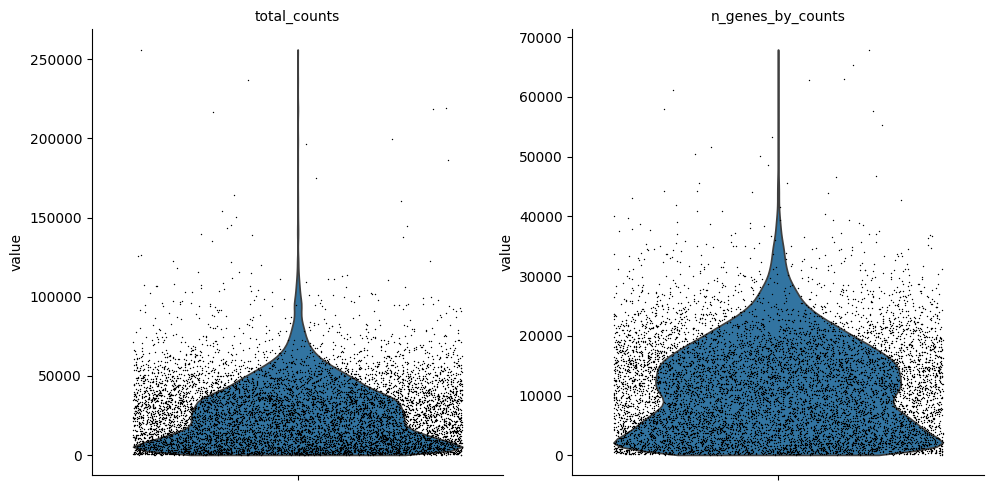

In [40]:
sc.pl.violin(atac, ['total_counts', 'n_genes_by_counts',], jitter=0.4, multi_panel=True)

Filter peaks with no expression

In [41]:
mu.pp.filter_var(atac, 'n_cells_by_counts', lambda x: x >= 10)

Filter cells based on peak QC

In [42]:
mu.pp.filter_obs(atac, 'n_genes_by_counts', lambda x: (x >= 2000) & (x <= 25000))
mu.pp.filter_obs(atac, 'total_counts', lambda x: (x >= 4000) & (x <= 750000))

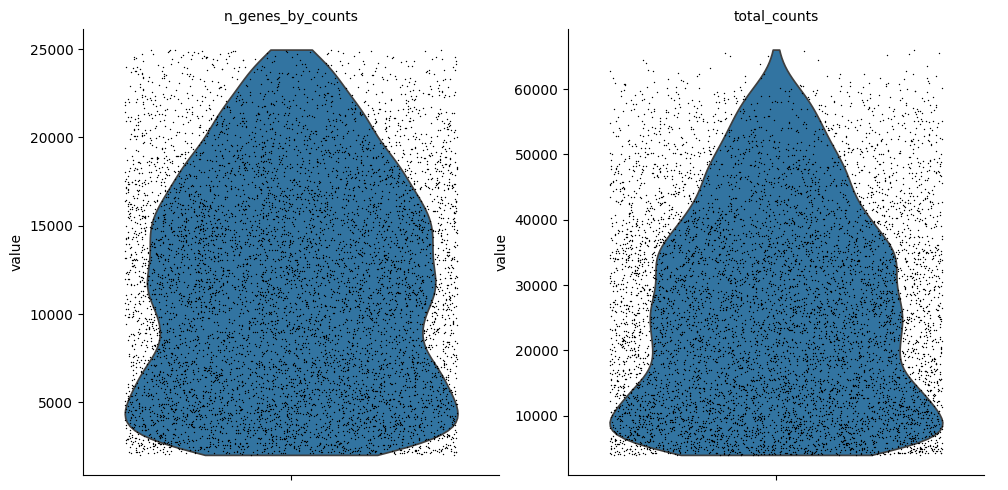

In [43]:
sc.pl.violin(atac, ['n_genes_by_counts', 'total_counts'], jitter=0.4, multi_panel=True)


In [ ]:
mu.atac.tl.locate_fragments(atac, fragments=os.path.join(raw_file_dir, "GSM6205427_E7.5_rep1_ATAC_fragments.tsv.gz"))

index `/gpfs/Labs/Uzun/DATA/PROJECTS/2024.SC_MO_TRN_DB.MIRA/REPOSITORY/CURRENT/SINGLE_CELL_DATASETS/DS014_DOI496239_MOUSE_ESC_RAW_FILES/E7.5_rep1/GSM6205427_E7.5_rep1_ATAC_fragments.tsv.gz.tbi` not found


#### Nucleosome signal
Fragment size distribution typically reflects nucleosome binding pattern showing enrichment around values corresponding to fragments bound to a single nucleosome (between 147 bp and 294 bp) as well as nucleosome-free fragments (shorter than 147 bp).

In [48]:
from muon import atac as ac

atac.obs['NS']=1
ac.pl.fragment_histogram(atac, region='chr1:1-2000000')

KeyError: 'files'

In [47]:
ac.tl.nucleosome_signal(atac, n=1e6)

KeyError: 'There is no fragments file located yet. Run muon.atac.tl.locate_fragments first.'